<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Шаги исследования:
1. Изучение данных из файла
    - скачиваем необходимые библиотеки
    - читаем файл
    - изучаем его методом info(): кол-во строк, названия столбцов, типы данных, пропуски
    - выводим несколько первых строк с помощью head()
2. Предобработка данных
    - меняем тип данных и заполняем пропуски, где это необходимо
    - проверяем датасет на дубликаты
3. Расчёты и добавление результатов в таблицу
    - получаем необходимые данные из других столбцов
    - при необходимости рассчитываем нужные показатели (цена кв.м и т.д.)
    - категоризируем данные (в новом столбце определить тип этажа)
4. Исследовательский анализ данных
    - получаем описание данных с помощью метода describe().
    - строим гистограммы, диаграмы размаха (ящики с усами).
    - убираем выбросы и лишние значения
    - определяем какие факторы влияют на стоимость с помощью корреляции и сводных таблиц.
    - определяем насленные пункты с наибольшим количество объявлений. Выделяем среди них пункты с самой высокой и самой низкой стоимстью кв.м
    - определяем границу центра Санкт-Петрбурга с помощью графика изменения стоимости кв.м в зависимости от расстояния от центра.
    - выделяем отдельно сегмент квартир в центре Санкт-Петербурга. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Определяем влияние факторов (число комнат, этаж, удалённость от центра, дата размещения объявления) на стоимость квартиры. Сравниваем получившиеся результаты с общими выводами по всему датасету.
5. Общий вывод
    - Кратко описываем полученные результаты.

## Изучение данных из файла

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [59]:
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True) #Приведём в нормальный вид название столбца

### Вывод

Пропуски есть в столбцах:
- ceiling_height (высота потолка) - Не трогаем, слишком много пропусков. Возможна замена на медиану, так как большая часть квартир имеет потолок стандартного размера. Но важно учитывать Санкт-Петербург, где высота потолка может сильно отличаться из-за коммунальных квартир с высокими потолками.
- floors_total (общее числло этажей) - пропусков мало, они составляют очень малую долю, их можно удалить
- living_area (жилая площадь) - Не трогаем
- is_apartment (является ли квартира апартаментами) - пропуски можно заменить на False, так как скорее всего, если там пропуск, то квартира не является апартаментами. Тип данных можно поменять на bool.
- kitchen_area (площадь кухни) - Не трогаем. Вариант замены: на медиану, если это будет необходимо для расчётов
- balcony (балкон) - заменить на ноль, так как если там пропуск, то скорее всего балкона нет.
- locality_name (место расположения) - лучше удалить строки с пропусками, они составляют малую долю, а если это другой регион, то могут исказить результаты расчётов.
- airports_nearest (расстояние до аэропорта) - Не трогаем. Возможно просто не было точного адреса квартиры, чтобы расчитать расстояние или был какой-то сбой в системе (напрмер, если в городе нет аэропорта, то расстояние до него не рассчитывается).
- city_centers_nearest (расстояние до центра города) -  Не трогаем, см. пункт выше, но уже до центра города. Были бы координаты или адрес, то можно было бы рассчитать.
-  parks_nearest,  ponds_nearest (расстояние до ближайшего парка, пруда) - слишком много пропусков, их тоже лучше не трогать. 
- parks_around3000, ponds_around3000 (парки и пруды в радиусе 3000 м) - возможно, пропуски в показателях 3000 м связаны с отсутствием явления и его можно заменить на 0. upd: пропуски лучше оставить.
- days_exposition (дительность размещения) - Не трогаем. Пропусков более чем 3 тыс. шт. Возможен вариант замены на медианное значение. Пропуск возможно связан с повторной публикацией объявления или сбоем в работе системы.

## Предобработка данных

In [60]:
print('Доли пропусков в столбцах:') #Добавил долю пропусков по столбцам
for i in df:
    na_share = 0
    na_share = df[i].isna().sum()/len(df)
    if na_share == 0:
        print(f'{i: <25}| Пропусков нет') #Чтобы точно знать, что пропусков нет. Иногда доля пропусков может быть очень незначительна
    else:
        print(f'{i: <25}| {na_share:.2%}')

Доли пропусков в столбцах:
total_images             | Пропусков нет
last_price               | Пропусков нет
total_area               | Пропусков нет
first_day_exposition     | Пропусков нет
rooms                    | Пропусков нет
ceiling_height           | 38.80%
floors_total             | 0.36%
living_area              | 8.03%
floor                    | Пропусков нет
is_apartment             | 88.29%
studio                   | Пропусков нет
open_plan                | Пропусков нет
kitchen_area             | 9.61%
balcony                  | 48.61%
locality_name            | 0.21%
airports_nearest         | 23.38%
city_centers_nearest     | 23.29%
parks_around3000         | 23.28%
parks_nearest            | 65.91%
ponds_around3000         | 23.28%
ponds_nearest            | 61.56%
days_exposition          | 13.42%


In [61]:
print(df['is_apartment'].unique())
print(df[df['is_apartment'] == False]['total_images'].count())# в столбце с определением апартментов значительная часть непропущенных значений - True. False составляют малую долю.
print(df['balcony'].unique()) # Проверял какие значения могут быть в разных столбцах. Сколько балконов может быть? оказывается даже 5.

[nan False True]
2725
[nan  2.  0.  1.  5.  4.  3.]


In [62]:
df['balcony'] = df['balcony'].fillna(0) #проводим замены пропусков в столбце с балконами на 0
df['is_apartment'] = df['is_apartment'].fillna(False) #проводим замены пропусков в столбце с апартаментами на False
df = df.dropna(subset=['floors_total','locality_name'])
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [63]:
#df['ponds_around3000'] = df['ponds_around3000'].fillna(0) #пропуски в этих столбцах лучше оставить, на корреляцию они не повлияют.
#df['parks_around3000'] = df['parks_around3000'].fillna(0)

Есть явно дорогие квартиры: за 65 млн руб. с площадью 159 кв.м и всего 7 км до центра:)

Ещё раз посмотрим на данные и выберем те столбцы, где нужно изменить тип:
- В столбце с апартаментами они сами изменились на bool
- день публикации изменить на dtype

In [64]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#меняем тип данных на datatime

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [66]:
display(df.head())# день публикации теперь отображается удобнее, без лишней информации о часах, минутах, секундах.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [67]:
df.duplicated().sum() #Дубликатов нет, это хорошо.

0

In [68]:
print('Доли пропусков в столбцах:') #Добавил долю пропусков по столбцам
for i in df:
    na_share = 0
    na_share = df[i].isna().sum()/len(df)
    if na_share == 0:
        print(f'{i: <25}| Пропусков нет') #Чтобы точно знать, что пропусков нет. Иногда доля пропусков может быть очень незначительна
    else:
        print(f'{i: <25}| {na_share:.2%}')

Доли пропусков в столбцах:
total_images             | Пропусков нет
last_price               | Пропусков нет
total_area               | Пропусков нет
first_day_exposition     | Пропусков нет
rooms                    | Пропусков нет
ceiling_height           | 38.55%
floors_total             | Пропусков нет
living_area              | 7.91%
floor                    | Пропусков нет
is_apartment             | Пропусков нет
studio                   | Пропусков нет
open_plan                | Пропусков нет
kitchen_area             | 9.43%
balcony                  | Пропусков нет
locality_name            | Пропусков нет
airports_nearest         | 23.44%
city_centers_nearest     | 23.34%
parks_around3000         | 23.34%
parks_nearest            | 65.92%
ponds_around3000         | 23.34%
ponds_nearest            | 61.65%
days_exposition          | 13.46%


In [69]:
df['total_area'] = df['total_area'].astype('float32') #замена типов данных у площадей на float32
df['living_area'] = df['living_area'].astype('float32')
df['kitchen_area'] = df['kitchen_area'].astype('float32')

Вывод:

Заменил пропуски в столбцах с балконами на 0, а в апартаментах на False. Тип данных самостоятельно поменялся на bool в столбце с апартаментми после удаления пропусков. В столбце с датой публикации поменял тип данных на datatime. У площадей заменил тип данных на float32 для экономии памяти.

Строки с пропусками в столбцах floors_total и locality_name составляли менее 1% и я их удалил.

Остальные пропуски в столбцах трогать не стал, так как нет четкого и явного значения замену и они составляют значительную часть датафрейма.

## Расчёты и добавление результатов в таблицу

In [70]:
df['sq_m_price'] = df['last_price']/df['total_area'] #новый столбец с ценой кв.м
df['exp_weekday'] = df['first_day_exposition'].dt.weekday #получаем новые столбцы с днём недели, месяцем, годом публикации объявления
df['exp_month'] = df['first_day_exposition'].dt.month
df['exp_year'] = df['first_day_exposition'].dt.year
#display(df.loc[(df['floor']/df['floors_total']) > 1]) #проверка, нет ли в данных этажа выше чем этажность здания
df['floor_type'] = df['floor'].where(df['floor'] != 1, 'первый').where(df['floor']/df['floors_total'] != 1, 'последний')
df['floor_type'] = df['floor_type'].where(df['floor_type'].isin(['первый','последний']), 'другой') #столбец с типами этажа
df['ratio_living_total'] = df['living_area']/df['total_area'] #отношение жилой площади к общей
df['ratio_kitchen_total'] = df['kitchen_area']/df['total_area'] #отношение кухни к общей площади

In [72]:
df['last_price_mln'] = df['last_price']/1000000 #так будет удобнее считать цену и не возиться с кучей нулей.

In [73]:
display(df.head(15)) #15 строк - чтобы увидеть значения первый, последний, другой в столбце floor_type

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_m_price,exp_weekday,exp_month,exp_year,floor_type,ratio_living_total,ratio_kitchen_total,last_price_mln
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,13.000
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,False,...,NaN,81.0,82920.788947,1,12,2018,первый,0.460396,0.272277,3.350
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,...,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,5.196
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN,64.900
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,10.000
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,False,...,NaN,55.0,95065.790667,0,9,2018,другой,0.473684,0.299342,2.890
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.600000,6,False,...,NaN,155.0,99195.712485,3,11,2017,другой,0.284182,0.386059,3.700
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,NaN,110544.695093,3,4,2019,другой,NaN,0.263966,7.915
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.430000,26,False,...,NaN,189.0,87454.765179,2,5,2018,другой,0.465320,0.265682,2.900
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,...,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,5.400


Добавил все пречисленные в заднии столбцы и ещё один со стоимостью квартиры в млн, чтобы было удобнее считать.

## Исследовательский анализ данных

In [74]:
df['total_area'].describe()

count    23565.000000
mean        60.322826
std         35.657059
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64

Значения очень похожи на правду, только выбивающиеся значения сильно меняют среднее, что видно по его разнице с медианой. 900 кв.м для квартры многовато. Больше похоже на крупный частный дом.

Text(0.5, 0, 'Total area, m2')

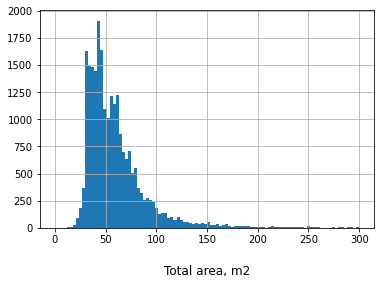

In [75]:
#df['total_area'].hist(bins=50) #пытаемся сначала построить гистограмму, по всем значениям. Видим, что большая часть находится в промежутке от 0 до 300 кв.м
df['total_area'].hist(bins=100, range=(0,300)).set_xlabel("Total area, m2", labelpad=20, size=12)
#plt.show()
#то же самое делаем с другими показателями

Возможно пики на гистограмме связаны с типичным метражом квартир. Так, первый пик 25-30 кв.м - типичный метраж однокомнатных квартир, 40-45 кв.м - двухкомнатных, 55-65 кв.м - трёхкомнатных.

<AxesSubplot:>

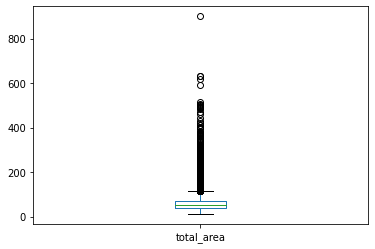

In [76]:
df['total_area'].plot.box()

In [77]:
df['last_price_mln'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_mln, dtype: float64

Text(0.5, 0, 'Price, mln')

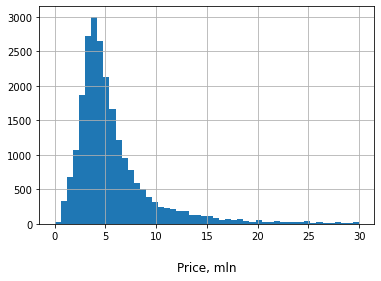

In [78]:
#df['last_price'].hist(bins=50)
df['last_price_mln'].hist(bins=50, range=(0,30)).set_xlabel("Price, mln", labelpad=20, size=12)#красота

Средняя цена квартиры составляет 6,5 млн, медиана - 4,6 млн. Возможно стоит убрать выбивающиеся значения, например, максимальное - 763 млн. Они искажают среднюю стоимость и сильно влияют на результаты исследования

In [79]:
#df['last_price_mln'].plot.box() #диаграмма размаха менее репрезентативна по сравнению с гистограммой

In [80]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0.5, 0, 'Rooms')

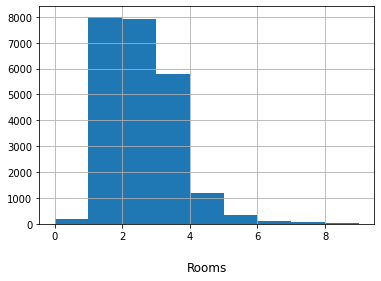

In [81]:
#df['rooms'].hist(bins=20) #лучше всего выбрать промежуток от 0 до 9 комнат
df['rooms'].hist(bins=9,range=(0,9)).set_xlabel("Rooms", labelpad=20, size=12)

<AxesSubplot:>

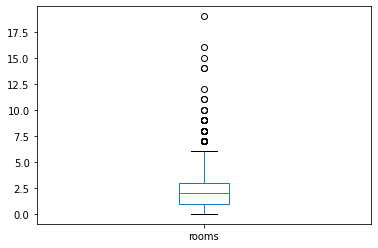

In [82]:
df['rooms'].plot.box()

Хорошо видно, что к выбросам можно отнести квартиры с 7 и более комнатами.

In [83]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Доля потолков ниже 2.5 метров: 0.003097814555484829
Доля потолков выше 4.5 метров: 0.003182686187141948


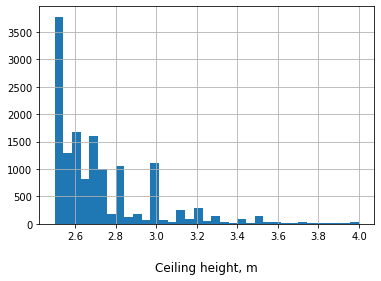

In [84]:
#df['ceiling_height'].hist(bins=50)
df['ceiling_height'].hist(bins=35, range=(2.5,4)).set_xlabel("Ceiling height, m", labelpad=20, size=12)
print('Доля потолков ниже 2.5 метров:', len(df.loc[df['ceiling_height'] < 2.5])/len(df))
print('Доля потолков выше 4.5 метров:', len(df.loc[df['ceiling_height'] > 4])/len(df))

Если выбрать 10 корзин для гистограммы, то мы увидим красивое распределение Пуассона. Но если увеличить число корзин,
то видны зубья, что связано с типичной высотой потолков в квартирах в разные временные эпохи: хрущевки - 2,5 м, сталинки (+современный комфорт класс и выше) - 3 и более м, современный эконом/стандарт и поздняя советская застройка - 2,7 м. Потолки ниже 2,5 м и выше 4 м составляют малую долю, поэтому их лучше отбросить.

In [85]:
#df['ceiling_height'].plot.box() #диаграмма размаха менее репрезентативна по сравнению с гистограммой

In [86]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'Exposition, days')

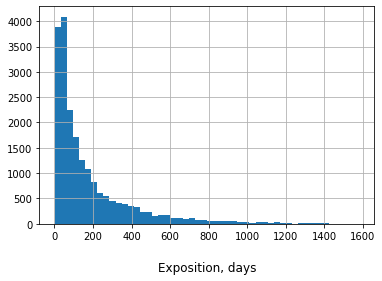

In [87]:
df['days_exposition'].hist(bins=50).set_xlabel("Exposition, days", labelpad=20, size=12)

Красивое распределение Пуассона. Медиана меньше среднего значения в 2 раза и стоит убрать выбросы. Половина квартир снимается с публикации в течение 3 месяцев. Самая длинная публикация составила более 4 лет. Необычно долгие публикации - те, продажа которых занимает более 425 дней - на графике гистораммы видна ступень на этом значении. Можно ещё проверить это диаграммой размаха.

<AxesSubplot:>

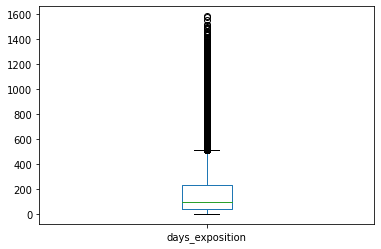

In [88]:
df['days_exposition'].plot.box()

Диаграмма размаха показывает, что к необычно долгим продажам относятся квартиры с длительностью публикации более 95+219,7*1,5= 425 дней (медиана плюс 1,5 стандартного отклонения).

In [89]:
print(len(df.query('days_exposition < 425'))/len(df)) #76,5% квартир продается раньше этого срока.

0.7650753235730957


Опираясь на данные гистограмм и данные "ящиков с усами" (диаграмм размаха) мы можем убрать все выбивающиеся значения и оставить только те, которые использовались в границах построения гистограмм.

In [90]:
#df.iloc[:,:23].describe() #Смотрел выбивающиеся значения по всем столбцам: минимальные и максимальные значения высоты потолков, кол-ва комнат, жилой площади

In [91]:
#df.iloc[:,23:].describe()

Убираем редкие и выбивающиеся значения.

In [92]:
print('Сколько строк было:', len(df))
print('Сколько строк удаляем:', len(df.query('total_area > 300 | last_price_mln > 30 | last_price_mln < 0.1 | rooms > 9 | rooms < 1 |ceiling_height > 4 | ceiling_height < 2.5'))) #сколько строк относятся к выбросам
df = (df.loc[~(df['total_area'] > 300)]
      .loc[~(df['last_price_mln'] > 30) & ~(df['last_price_mln'] < 0.1)]
      .loc[~(df['rooms'] > 9) & ~(df['rooms'] < 1)]
      .loc[~(df['ceiling_height'] > 4) & ~(df['ceiling_height'] < 2.5)])
print('Сколько строк стало:', len(df))

Сколько строк было: 23565
Сколько строк удаляем: 657
Сколько строк стало: 22908


In [93]:
df_filt = df[['total_area','rooms', 'city_centers_nearest', 'last_price_mln']]
display(df_filt.head())

,total_area,rooms,city_centers_nearest,last_price_mln
0,108.000000,3,16028.0,13.000
1,40.400002,1,18603.0,3.350
2,56.000000,2,13933.0,5.196
4,100.000000,2,8098.0,10.000
5,30.400000,1,NaN,2.890


In [94]:
df_filt.corr()

,total_area,rooms,city_centers_nearest,last_price_mln
total_area,1.000000,0.794304,-0.222250,0.791436
rooms,0.794304,1.000000,-0.165109,0.515630
city_centers_nearest,-0.222250,-0.165109,1.000000,-0.346786
last_price_mln,0.791436,0.515630,-0.346786,1.000000


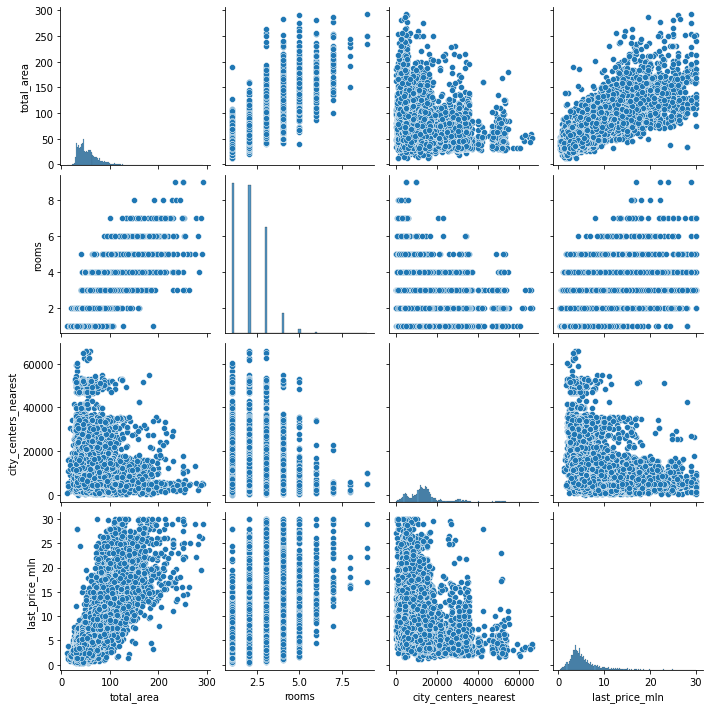

In [95]:
sns.pairplot(df_filt)

Здесь видно явную взамосвязь между площадью квартиры, количеством комнат и ценой. Чем больше комнат и площадь квартиры, тем выше цена. В меньшей мере оказывает влияние на цену квартиры удалённость от центра: чем дальше от центра, тем ниже цена.

Так как показатель типа этажа (floor_type) категориальный, то построим сводную таблицу.

In [96]:
df_floor_type_pt = df.pivot_table(index='floor_type', values='last_price_mln', aggfunc=['median', 'count']).sort_values(by=('median','last_price_mln'), ascending=False)
display(df_floor_type_pt)

,median,count
,last_price_mln,last_price_mln
floor_type,,
другой,4.80,16842
последний,4.25,3232
первый,3.90,2834


<AxesSubplot:xlabel='Floor type', ylabel='mln'>

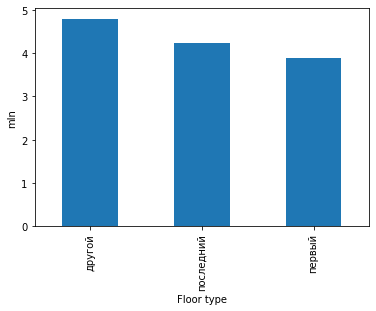

In [97]:
df_floor_type_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Floor type', ylabel='mln')

Квартира на первом этаже стоит дешевле, чем на остальных этажах по ряду причин:
1. Холодно и влажно: близость к подвалу
2. Любопытные прохожие
3. Привлекательность для воров
4. Живность от магазинов
5. Шумно и пыльно, если квартира у дороги
6. Вид из окон может быть перекрыт растительностью

В современных постройках первые этажи чаще всего отдают под коммерческую недвижимость, что является хорошим вариантом решения проблемы.

На последний этаж трудно добираться, особенно если возникнут проблемы с лифтом, а также не все любят вид из окна с большой высоты. Самая высокая цена у других этажей.

Зависимость цены квартиры от месяца, дня недели и года лучше рассмотреть через сводные таблицы и построить по ним графики, так как здесь цена квартиры может изменяться нелинейно.

In [98]:
df_weekday_pt = df.pivot_table(index='exp_weekday', values='last_price_mln', aggfunc=['median', 'count'])
display(df_weekday_pt)

,median,count
,last_price_mln,last_price_mln
exp_weekday,,
0,4.60,3504
1,4.70,4053
2,4.70,3847
3,4.60,4142
4,4.55,3861
5,4.50,1871
6,4.50,1630


<AxesSubplot:xlabel='Weekday', ylabel='mln'>

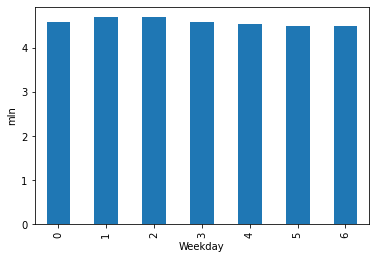

In [99]:
df_weekday_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Weekday', ylabel='mln')

По дням недели разница минимальная и находится в пределах погрешности.

In [100]:
df_month_pt = df.pivot_table(index='exp_month', values='last_price_mln', aggfunc=['median', 'count']) 
display(df_month_pt)

,median,count
,last_price_mln,last_price_mln
exp_month,,
1,4.6000,1444
2,4.6500,2567
3,4.6375,2504
4,4.7995,2308
5,4.5000,1224
6,4.3900,1707
7,4.6000,1636
8,4.5700,1683


<AxesSubplot:xlabel='Month', ylabel='mln'>

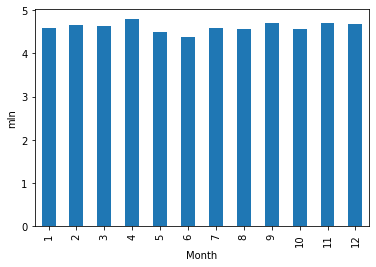

In [101]:
df_month_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Month', ylabel='mln')

На графике видно увеличение стоимости квартир с начала года до апреля (на сленге риелторов: "народ отходит от новогодних праздников и рынок оживает"), а затем видно снижение стоимости квартир с мая по июнь, что возможно связано с приблежением сезона отпусков и падением спроса на квартиры. К осени средние цены на квартиры восстанавливаются.

In [102]:
df_year_pt = df.pivot_table(index='exp_year', values='last_price_mln', aggfunc=['median', 'count'])
display(df_year_pt)

,median,count
,last_price_mln,last_price_mln
exp_year,,
2014,7.38828,128
2015,5.20000,1120
2016,4.50000,2675
2017,4.50000,7901
2018,4.57000,8287
2019,5.00000,2797


<AxesSubplot:xlabel='Year', ylabel='mln'>

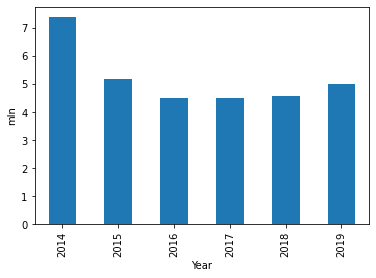

In [103]:
df_year_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Year', ylabel='mln')

Очень мало объявлений в 2014 году, поэтому выборка с учётом этого года может быть нерепрезентативна (слабая представленность одной из групп). Правильно рассмотреть период 2015-2019 гг. В 2015 году цены на недвижимость находились на высоком уровне, так как было значительное колебание курса валюты и высокий темп инфляции. В этот преиод люди пытались сохранить свои деньги (вложение в недвижимость было одним из таких способов). В 2016 году произошёл спад цен на квартиры в связи с укреплением курса рубля и стабилизацией экономической ситуации.

В 2017-2019 гг. происходил постепенный рост цен, что связано с ростом курса доллара и увеличением цен на некоторые строительные материалы. Или, предположительно, с введением программы семейной ипотеки, которая позволила покупать семьям с детьми жилье в ипотеку под низкий процент (6%), что увеличило спрос. 

In [104]:
top_publ = df['locality_name'].value_counts().head(10).index

In [105]:
df_top_10_publ = df.query('locality_name.isin(@top_publ)').pivot_table(index='locality_name', values='sq_m_price', aggfunc=['median', 'mean', 'count']).sort_values(by=('median','sq_m_price'), ascending=False)
display(df_top_10_publ)

,median,mean,count
,sq_m_price,sq_m_price,sq_m_price
locality_name,,,
Санкт-Петербург,104033.973646,110461.296946,15139
Пушкин,99987.179487,103084.708140,363
посёлок Парголово,91984.437700,90320.008942,322
деревня Кудрово,91666.666667,92297.218760,283
посёлок Мурино,84285.714286,85076.238764,493
посёлок Шушары,76666.666667,78277.935486,435
Колпино,74723.748474,75352.475490,336
Гатчина,67860.570210,68757.678558,306


<AxesSubplot:xlabel='Top 10 cities with the most publications', ylabel='Rub/m2'>

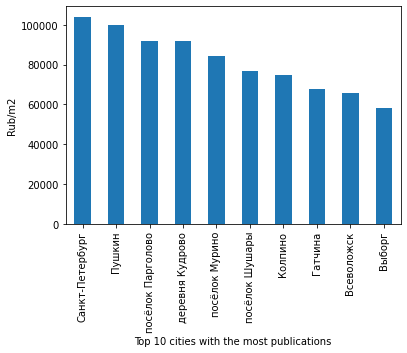

In [106]:
df_top_10_publ.plot(y=('median','sq_m_price'), kind='bar', legend=False, xlabel='Top 10 cities with the most publications', ylabel='Rub/m2')

Самые дорогие квартиры в Санкт-Петербурге и Пушкине. Также высокие цены в Кудрово и Парголово. Самые низкие цены - в Гатчине, Всеволжске и Выборге. 

In [107]:
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург'] #фильтруем объявления только из Санкт-Петербурга
df_spb['city_center_km'] = df_spb['city_centers_nearest']/1000
df_spb['city_center_km'] = df_spb['city_center_km'].round(0)
display(df_spb.head())

/tmp/ipykernel_36/1760451504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_center_km'] = df_spb['city_centers_nearest']/1000
/tmp/ipykernel_36/1760451504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_center_km'] = df_spb['city_center_km'].round(0)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sq_m_price,exp_weekday,exp_month,exp_year,floor_type,ratio_living_total,ratio_kitchen_total,last_price_mln,city_center_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,13.000,16.0
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,...,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,5.196,14.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,10.000,8.0
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,110544.695093,3,4,2019,другой,NaN,0.263966,7.915,12.0
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,...,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,5.400,15.0


In [108]:
df_spb_pivot = df_spb.pivot_table(index='city_center_km', values='sq_m_price', aggfunc=['mean','median','count'])
display(df_spb_pivot)

,mean,median,count
,sq_m_price,sq_m_price,sq_m_price
city_center_km,,,
0.0,116000.381323,109900.000000,13
1.0,144405.249399,124145.394007,170
2.0,126511.545865,116593.033135,272
3.0,116709.811769,107567.567568,333
4.0,124914.600283,116372.027775,646
5.0,131600.604291,125233.644860,853
6.0,130429.444836,123409.090909,540
7.0,131214.639409,121348.314607,365


<AxesSubplot:xlabel='Distance from city center, km'>

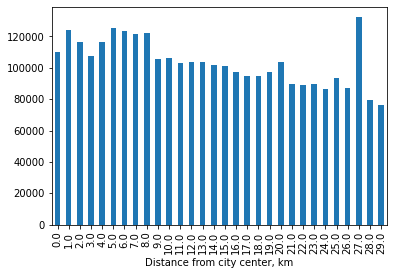

In [109]:
df_spb_pivot.plot(y=('median','sq_m_price'), kind='bar', legend=False, xlabel='Distance from city center, km')

По графику видно, что граница центра города находится на 8 км (явная ступень в графике). Есть несколько выбросов (20 км, 27 км), что связано с низкой представленностью этих групп объявлений. Их можно заменить на среднее между двумя соседними столбцами.

In [110]:
df_spb_center = df_spb.query('city_center_km <= 8')
#display(df_spb_center.head())
df_spb_center[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].describe()

,total_area,last_price_mln,rooms,ceiling_height
count,3763.000000,3763.000000,3763.000000,2442.000000
mean,81.005119,10.152821,2.642838,3.025987
std,38.679436,5.585848,1.237159,0.324643
min,12.000000,1.600000,1.000000,2.500000
25%,53.000000,6.300000,2.000000,2.800000
50%,73.000000,8.500000,3.000000,3.000000
75%,98.000000,12.500000,3.000000,3.200000
max,292.200012,30.000000,9.000000,4.000000


In [111]:
df[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].describe()#для сравнения те же данные по всему массиву объявлений.

,total_area,last_price_mln,rooms,ceiling_height
count,22908.000000,22908.000000,22908.000000,14048.000000
mean,58.314491,5.750022,2.052427,2.714994
std,27.230707,4.014450,0.997531,0.249144
min,12.000000,0.430000,1.000000,2.500000
25%,40.000000,3.439800,1.000000,2.510000
50%,52.000000,4.600000,2.000000,2.650000
75%,68.500000,6.650000,3.000000,2.800000
max,292.200012,30.000000,9.000000,4.000000


Видно, что квартиры в центре стоят дороже (что очевидно), имеют большую комнатность и площадь, а также высота потолков там выше. Это объясняется более старым фондом в центре города, который включает в себя в том числе коммунальные квартиры. 

In [114]:
df_spb_center[['rooms', 'city_centers_nearest', 'total_area', 'last_price_mln']].corr()

,rooms,city_centers_nearest,total_area,last_price_mln
rooms,1.000000,-0.227688,0.807064,0.491018
city_centers_nearest,-0.227688,1.000000,-0.189085,-0.124611
total_area,0.807064,-0.189085,1.000000,0.743633
last_price_mln,0.491018,-0.124611,0.743633,1.000000


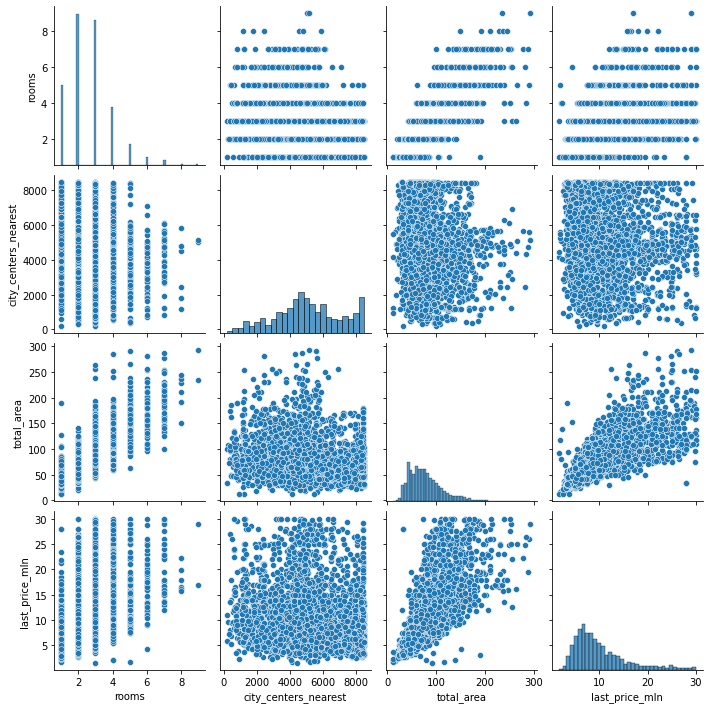

In [115]:
sns.pairplot(df_spb_center[['rooms', 'city_centers_nearest', 'total_area', 'last_price_mln']])

По сравнению с общим массивом данных, в центре Санкт-Петербурга не прослеживается увеличение цены с приближением к центру города (все квартры итак в центре), но сохраняется значимость фактора количества комнат и площади: чем больше комнат и площадь квартиры, тем выше цена квартиры. Дата публикации объявления и тип этажа также представляет собой нелинейную зависимость и поэтому их лучше рассмотреть через сводную таблицу и построить по ним графики зависимости цены от даты публикации объялвения и типа этажа.

In [119]:
df_spb_center_ft_pt = df_spb_center.pivot_table(index='floor_type', values='last_price_mln', aggfunc=['median', 'count']).sort_values(by=('median','last_price_mln'), ascending=False)
display(df_spb_center_ft_pt)

,median,count
,last_price_mln,last_price_mln
floor_type,,
другой,8.900,2721
последний,8.589,625
первый,6.350,417


<AxesSubplot:xlabel='Floor type', ylabel='mln'>

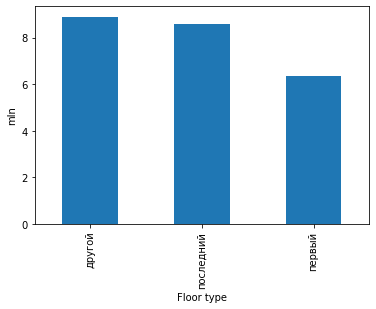

In [120]:
df_spb_center_ft_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Floor type', ylabel='mln')

С этажом квартры в центре прослеживается та же зависимоть, как и в общем массиве данных: самые дешёвые квартиры на первом этаже, самые дорогие на других. Разница между другими этажами и последним меньше у квартир в центре, чем в общем массиве данных, так как в центре Санкт-Петербурга средняя этажность ниже.

In [122]:
df_spb_center_wd_pt = df_spb_center.pivot_table(index='exp_weekday', values='last_price_mln', aggfunc=['median', 'count'])
display(df_spb_center_wd_pt)

,median,count
,last_price_mln,last_price_mln
exp_weekday,,
0,8.8,569
1,8.3,640
2,8.7,658
3,8.5,771
4,8.5,635
5,8.0,275
6,8.7,215


<AxesSubplot:xlabel='Weekday', ylabel='mln'>

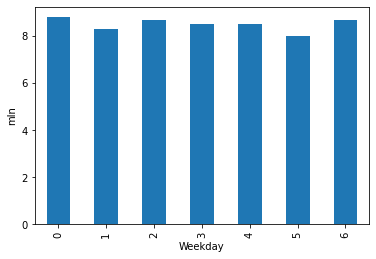

In [123]:
df_spb_center_wd_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Weekday', ylabel='mln')

In [127]:
df_spb_center_month_pt = df_spb_center.pivot_table(index='exp_month', values='last_price_mln', aggfunc=['median', 'count'])
display(df_spb_center_month_pt)

,median,count
,last_price_mln,last_price_mln
exp_month,,
1,8.550000,235
2,8.500000,402
3,8.700000,397
4,8.420000,363
5,8.435051,221
6,8.262475,294
7,8.888888,301
8,8.500000,279


<AxesSubplot:xlabel='Month', ylabel='mln'>

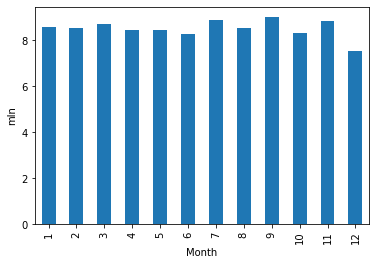

In [128]:
df_spb_center_month_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Month', ylabel='mln')

In [130]:
df_spb_center_year_pt = df_spb_center.pivot_table(index='exp_year', values='last_price_mln', aggfunc=['median', 'count'])
display(df_spb_center_year_pt)

,median,count
,last_price_mln,last_price_mln
exp_year,,
2014,12.561120,25
2015,8.995000,316
2016,8.800000,513
2017,8.500000,1336
2018,8.385000,1166
2019,8.599999,407


<AxesSubplot:xlabel='Year', ylabel='mln'>

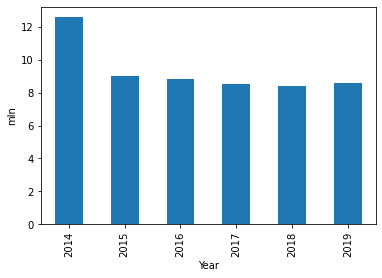

In [131]:
df_spb_center_year_pt.plot(y=('median','last_price_mln'), kind='bar', legend=False, xlabel='Year', ylabel='mln')

Существенную взамосвязь между ценой квартиры в центре и днём недели (или месяцем) публикации выделить сложно, как и в общем массиве данных. В декабре наблюдается заметное снижение средней цены квартиры в центре в объявлениях, но определить фактор этого явления представляется затруднительным. 

Изменение цены в 2015-2019 гг. в объявлениях квартир в центре Санкт-Петербурга является слабозаметным по сравнению с общим массивом данных. Спрос на эти квартиры всегда находится на высоком уровне. 2014 год включать в исследование является некорректным из-за слабой представленности этой группы квартир (как и в общем массиве данных).

## Общий вывод

Для анализа были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Он содержал в себе более 23,5 тыс. строк с описанием квартиры, датой публикации, ценой и прочими данными.

В данных были обнаружены пропуски в 14 столбцах. Пропуски в столбце с балконами заменил на 0 (отстутствие явления), в апартаментах на False. Тип данных поменял на bool в столбце с апартаментми, на datatime в столбце датой публикации. У площадей заменил тип данных на float32 для экономии памяти.
Строки с пропусками были удалены в столбцах floors_total и locality_name - там они составляли менее 1%.

Пропуски в остальных столбцах были оставлены без изменения так как нет четкого и явного значения замену и они составляют значительную часть датафрейма (более 1%).

Для расчета линейной зависимости показателей использовался коэффициент корреляции Пирсона. Для поиска нелинейной зависимости и анализа категориальных значений данные визуализировались с помощью столбчатых диаграмм.

Основные выводы:
- В исследуемом регионе (Санкт-Петербург и Ленинградская обл.) средняя квартира в объявлениях выглядит следующем образом: Двухкомнатная квартра площадью - 52 кв. м и высотой потолков 2,65 м. Цена продажи - 4,65 млн руб. 
- Значимое влияние на стоимость квартиры в общем массиве данных оказывают площадь, комнатность квартиры, её удалённость от центра города и на каком этаже она расположена (первом, последнем, другом). Самая низкая цена на первом, немного выше на последнем и самые дорогие квартиры на других этажах.
- Летом цена квартир в объявлениях немного снижается, что предположительно связяно с падением спроса из-за приближения сезона отпусков. 
- Центральный район Санкт-Петербурга находится в радиусе 8 км от центра города. Это было определено на основе резкого понижения средней цены кв.м в объявлениях. 
- В этом районе на цену квартиры не оказывает вляние расстояние от центра города (все квартиры итак в центре) и менее заметен сезонный фактор. Здесь также как и во всем исследуемом регионе играет значение на каком этаже расположена квартира, её площадь и комнатность. Разница между ценой последнего этажа и другими (искл. первый) здесь ниже, чем в общем объеме данных
- Важно отметить, что в объявлениях по всему региону наблюдался рост цены кв.м в 2016-2019 гг., что возможно связано с инфляцией, реализацией государственных программ по улучшению доступности ипотеки для определенных групп граждан или другими факторами. 
- В объявлениях в центре Санкт-Петербурга это изменение цены было слабозаметным, так как спрос на эти квартиры всегда находится на высоком уровне.
- День недели публикации объявления существенного влияния на стоимость квартиры не оказывает. 

Итоговые параметры для рыночной оценки стоимости квартиры: 
* площадь (или комнатность)
* этаж, на котором расположена квратира: первый, последний, другой (по возрастанию цены)
* удалённость от центра !Этот показатель не работатет для квартир в центре города (для СПб это радиус менее 8 км от центра)
* сезонность (лето и другое время года) !Влияет только на квартиры вне центра города